This notebook provides demo code that runs VGGT, introduced in [“VGGT: Visual Geometry-Grounded Transformer” [Wand et al., 2025]](https://github.com/facebookresearch/vggt), and visualizes its results with Rerun.io.

The inference code is adapted from [vggt](https://github.com/facebookresearch/vggt), and the visualization code draws on [vggt-pytorch-inference](https://github.com/ibaiGorordo/vggt-pytorch-inference).

# Install

When using the rerun-sdk in a Kaggle Notebook, you need to restart the notebook after running `pip install`.  
Click the **"︙ (More settings)"** button in the top-right corner and select **"Restart & Clear Cell Outputs"**.

In [1]:
! uv pip install --system jaxtyping rerun-sdk[notebook]
# ! uv pip install --system https://github.com/facebookresearch/vggt.git

Using Python 3.11.11 environment at: /usr
Resolved 30 packages in 92ms                                         
Uninstalled 1 package in 22ms
Installed 1 package in 29ms                                 
 - numpy==1.26.4
 + numpy==2.3.1


In [2]:
# 1. 克隆源码
!git clone https://github.com/facebookresearch/vggt.git

# 2. 进入目录
%cd vggt

# 3. 安装完整依赖
!pip install -r requirements.txt

# 4. （可选）以开发者模式安装 vggt，便于直接 import 并支持源码修改自动生效
!pip install -e .


Cloning into 'vggt'...
remote: Enumerating objects: 1108, done.
remote: Counting objects: 100% (441/441), done.
remote: Compressing objects: 100% (159/159), done.
remote: Total 1108 (delta 363), reused 282 (delta 282), pack-reused 667 (from 2)
Receiving objects: 100% (1108/1108), 64.69 MiB | 56.14 MiB/s, done.
Resolving deltas: 100% (589/589), done.
/kaggle/working/vggt
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.2/779.2 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 105.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 91.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 75.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 79.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━

In [3]:
!pip install -r requirements_demo.txt

  Cloning https://github.com/jytime/LightGlue.git to /tmp/pip-install-hvo9vx8a/lightglue_62c94ca837d14f84baab496e384c81e6
  Running command git clone --filter=blob:none --quiet https://github.com/jytime/LightGlue.git /tmp/pip-install-hvo9vx8a/lightglue_62c94ca837d14f84baab496e384c81e6
  Resolved https://github.com/jytime/LightGlue.git to commit 2f23ca2ea9638cecad7f7220795210fc6b8353c3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 30.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.9/28.9 MB 69.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 35.1 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 82.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3

# Inference

In [11]:
import os
import shutil
from pathlib import Path

# ✅ 设置源目录和目标目录
source_dir = Path("/kaggle/input/image-matching-challenge-2025/train/ETs")          # 替换成你原始图片所在的路径
scene_dir = Path("/kaggle/working/ETs/et")
target_dir = scene_dir/"images"  # 目标路径


# ✅ 创建目标目录（如果不存在）
target_dir.mkdir(parents=True, exist_ok=True)

# ✅ 拷贝符合 et_*.png 的文件
for png_file in source_dir.glob("et_*.png"):
    shutil.copy(png_file, target_dir)
    print(f"Copied: {png_file.name}")


Copied: et_et004.png
Copied: et_et002.png
Copied: et_et006.png
Copied: et_et008.png
Copied: et_et003.png
Copied: et_et007.png
Copied: et_et000.png
Copied: et_et001.png
Copied: et_et005.png


In [5]:
!pip install lightglue

In [13]:
from dataclasses import dataclass

import torch
from vggt.models.vggt import VGGT
from vggt.utils.geometry import unproject_depth_map_to_point_map
from vggt.utils.load_fn import load_and_preprocess_images, load_and_preprocess_images_square
from vggt.utils.pose_enc import pose_encoding_to_extri_intri

import random
import numpy as np
import glob
import os
import copy
import torch
import torch.nn.functional as F

# Configure CUDA settings
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = True
torch.backends.cudnn.deterministic = False

import argparse
from pathlib import Path
import trimesh
import pycolmap

from vggt.utils.helper import create_pixel_coordinate_grid, randomly_limit_trues
from vggt.dependency.track_predict import predict_tracks
from vggt.dependency.np_to_pycolmap import batch_np_matrix_to_pycolmap, batch_np_matrix_to_pycolmap_wo_track

@dataclass
class VGGTResult:
    inputs: torch.Tensor  # [num_images, 3, H, W]
    width: int
    height: int
    extrinsic: torch.Tensor  # [num_images, 3, 4]
    intrinsic: torch.Tensor  # [num_images, 3, 3]
    depth_map: torch.Tensor  # [num_images, H, W, 1]
    depth_conf: torch.Tensor  # [num_images, H, W]
    point_map: torch.Tensor  # [num_images, H, W, 3]
    point_conf: torch.Tensor  # [num_images, H, W]
    point_map_by_unprojection: torch.Tensor  # [num_images, H, W, 3]

    @property
    def images(self) -> torch.Tensor:
        """Convert the inputs to images for visualization.

        Returns:
            torch.Tensor: The images in uint8 format. [num_images, H, W, 3].
        """
        return (self.inputs.permute(0, 2, 3, 1) * 255).clamp(0, 255).to(torch.uint8)


class VGGTRunner:
    """VGGT Runner

    Attributes:
        model_path (str): The path to the VGGT model.
        dtype (torch.dtype | None): The dtype of the model.
        device (torch.device | str | None): The device of the model.
    """

    def __init__(
        self,
        model_path: str = "facebook/VGGT-1B",
        dtype: torch.dtype | None = None,
        device: torch.device | str | None = None,
    ):
        """Initialize the VGGT Runner.

        Args:
            model_path (str): The path to the VGGT model.
            dtype (torch.dtype | None, optional): The dtype for autocasting. Defaults to None.
            device (torch.device | str | None, optional): The device of the model. Defaults to None.
        """
        self.dtype = dtype if dtype is not None else torch.bfloat16 if torch.cuda.get_device_capability()[0] >= 8 else torch.float16
        self.device = torch.device(device) if device is not None else torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = VGGT.from_pretrained(model_path).eval().to(self.device)

    def __call__(self, image_paths: list[str]) -> VGGTResult:
        """Inference the VGGT model.

        Args:
            image_paths (list[str]): The paths to the images.

        Returns:
            VGGTResult: The result of the inference.
        """
        inputs = load_and_preprocess_images(image_paths).to(self.device).unsqueeze(0)
        with torch.inference_mode():
            with torch.amp.autocast(str(self.device), dtype=self.dtype):
                aggregated_tokens_list, ps_idx = self.model.aggregator(inputs)
            pose_enc = self.model.camera_head(aggregated_tokens_list)[-1]
            extrinsic, intrinsic = pose_encoding_to_extri_intri(pose_enc, inputs.shape[-2:])
            depth_map, depth_conf = self.model.depth_head(aggregated_tokens_list, inputs, ps_idx)
            point_map, point_conf = self.model.point_head(aggregated_tokens_list, inputs, ps_idx)
            point_map_by_unprojection = unproject_depth_map_to_point_map(depth_map.squeeze(0), extrinsic.squeeze(0), intrinsic.squeeze(0))
        return VGGTResult(
            inputs=inputs.cpu().squeeze(0),
            width=inputs.shape[3],
            height=inputs.shape[2],
            extrinsic=extrinsic.cpu().squeeze(0),
            intrinsic=intrinsic.cpu().squeeze(0),
            depth_map=depth_map.cpu().squeeze(0),
            depth_conf=depth_conf.cpu().squeeze(0),
            point_map=point_map.cpu().squeeze(0),
            point_conf=point_conf.cpu().squeeze(0),
            point_map_by_unprojection=torch.from_numpy(point_map_by_unprojection),
        )


In [14]:
def parse_args(argv=None):
    parser = argparse.ArgumentParser(description="VGGT Demo")
    parser.add_argument("--scene_dir", type=str, required=True, help="Directory containing the scene images")
    parser.add_argument("--seed", type=int, default=42, help="Random seed for reproducibility")
    parser.add_argument("--use_ba", action="store_true", default=False, help="Use BA for reconstruction")
    parser.add_argument("--max_reproj_error", type=float, default=8.0, help="Maximum reprojection error")
    parser.add_argument("--shared_camera", action="store_true", default=False)
    parser.add_argument("--camera_type", type=str, default="SIMPLE_PINHOLE")
    parser.add_argument("--vis_thresh", type=float, default=0.2)
    parser.add_argument("--query_frame_num", type=int, default=8)
    parser.add_argument("--max_query_pts", type=int, default=4096)
    parser.add_argument("--fine_tracking", action="store_true", default=True)
    parser.add_argument("--conf_thres_value", type=float, default=5.0)
    
    return parser.parse_args(argv)


In [15]:
def run_VGGT(model, images, dtype, resolution=518):
    # images: [B, 3, H, W]

    assert len(images.shape) == 4
    assert images.shape[1] == 3

    # hard-coded to use 518 for VGGT
    images = F.interpolate(images, size=(resolution, resolution), mode="bilinear", align_corners=False)

    with torch.no_grad():
        with torch.cuda.amp.autocast(dtype=dtype):
            images = images[None]  # add batch dimension
            aggregated_tokens_list, ps_idx = model.aggregator(images)

        # Predict Cameras
        pose_enc = model.camera_head(aggregated_tokens_list)[-1]
        # Extrinsic and intrinsic matrices, following OpenCV convention (camera from world)
        extrinsic, intrinsic = pose_encoding_to_extri_intri(pose_enc, images.shape[-2:])
        # Predict Depth Maps
        depth_map, depth_conf = model.depth_head(aggregated_tokens_list, images, ps_idx)

    extrinsic = extrinsic.squeeze(0).cpu().numpy()
    intrinsic = intrinsic.squeeze(0).cpu().numpy()
    depth_map = depth_map.squeeze(0).cpu().numpy()
    depth_conf = depth_conf.squeeze(0).cpu().numpy()
    return extrinsic, intrinsic, depth_map, depth_conf


def demo_fn(args):
    # Print configuration
    print("Arguments:", vars(args))

    # Set seed for reproducibility
    np.random.seed(args.seed)
    torch.manual_seed(args.seed)
    random.seed(args.seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(args.seed)
        torch.cuda.manual_seed_all(args.seed)  # for multi-GPU
    print(f"Setting seed as: {args.seed}")

    # Set device and dtype
    dtype = torch.bfloat16 if torch.cuda.get_device_capability()[0] >= 8 else torch.float16
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"Using device: {device}")
    print(f"Using dtype: {dtype}")

    # Run VGGT for camera and depth estimation
    model = VGGT()
    _URL = "https://huggingface.co/facebook/VGGT-1B/resolve/main/model.pt"
    model.load_state_dict(torch.hub.load_state_dict_from_url(_URL))
    model.eval()
    model = model.to(device)
    print(f"Model loaded")

    # Get image paths and preprocess them
    image_dir = os.path.join(args.scene_dir, "images")
    image_path_list = glob.glob(os.path.join(image_dir, "*"))
    if len(image_path_list) == 0:
        raise ValueError(f"No images found in {image_dir}")
    base_image_path_list = [os.path.basename(path) for path in image_path_list]

    # Load images and original coordinates
    # Load Image in 1024, while running VGGT with 518
    vggt_fixed_resolution = 518
    img_load_resolution = 1024

    images, original_coords = load_and_preprocess_images_square(image_path_list, img_load_resolution)
    images = images.to(device)
    original_coords = original_coords.to(device)
    print(f"Loaded {len(images)} images from {image_dir}")

    # Run VGGT to estimate camera and depth
    # Run with 518x518 images
    extrinsic, intrinsic, depth_map, depth_conf = run_VGGT(model, images, dtype, vggt_fixed_resolution)
    points_3d = unproject_depth_map_to_point_map(depth_map, extrinsic, intrinsic)

    if args.use_ba:
        image_size = np.array(images.shape[-2:])
        scale = img_load_resolution / vggt_fixed_resolution
        shared_camera = args.shared_camera

        with torch.cuda.amp.autocast(dtype=dtype):
            # Predicting Tracks
            # Using VGGSfM tracker instead of VGGT tracker for efficiency
            # VGGT tracker requires multiple backbone runs to query different frames (this is a problem caused by the training process)
            # Will be fixed in VGGT v2

            # You can also change the pred_tracks to tracks from any other methods
            # e.g., from COLMAP, from CoTracker, or by chaining 2D matches from Lightglue/LoFTR.
            pred_tracks, pred_vis_scores, pred_confs, points_3d, points_rgb = predict_tracks(
                images,
                conf=depth_conf,
                points_3d=points_3d,
                masks=None,
                max_query_pts=args.max_query_pts,
                query_frame_num=args.query_frame_num,
                keypoint_extractor="aliked+sp",
                fine_tracking=args.fine_tracking,
            )

            torch.cuda.empty_cache()

        # rescale the intrinsic matrix from 518 to 1024
        intrinsic[:, :2, :] *= scale
        track_mask = pred_vis_scores > args.vis_thresh

        # TODO: radial distortion, iterative BA, masks
        reconstruction, valid_track_mask = batch_np_matrix_to_pycolmap(
            points_3d,
            extrinsic,
            intrinsic,
            pred_tracks,
            image_size,
            masks=track_mask,
            max_reproj_error=args.max_reproj_error,
            shared_camera=shared_camera,
            camera_type=args.camera_type,
            points_rgb=points_rgb,
        )

        if reconstruction is None:
            raise ValueError("No reconstruction can be built with BA")

        # Bundle Adjustment
        ba_options = pycolmap.BundleAdjustmentOptions()
        pycolmap.bundle_adjustment(reconstruction, ba_options)

        reconstruction_resolution = img_load_resolution
    else:
        conf_thres_value = args.conf_thres_value
        max_points_for_colmap = 100000  # randomly sample 3D points
        shared_camera = False  # in the feedforward manner, we do not support shared camera
        camera_type = "PINHOLE"  # in the feedforward manner, we only support PINHOLE camera

        image_size = np.array([vggt_fixed_resolution, vggt_fixed_resolution])
        num_frames, height, width, _ = points_3d.shape

        points_rgb = F.interpolate(
            images, size=(vggt_fixed_resolution, vggt_fixed_resolution), mode="bilinear", align_corners=False
        )
        points_rgb = (points_rgb.cpu().numpy() * 255).astype(np.uint8)
        points_rgb = points_rgb.transpose(0, 2, 3, 1)

        # (S, H, W, 3), with x, y coordinates and frame indices
        points_xyf = create_pixel_coordinate_grid(num_frames, height, width)

        conf_mask = depth_conf >= conf_thres_value
        # at most writing 100000 3d points to colmap reconstruction object
        conf_mask = randomly_limit_trues(conf_mask, max_points_for_colmap)

        points_3d = points_3d[conf_mask]
        points_xyf = points_xyf[conf_mask]
        points_rgb = points_rgb[conf_mask]

        print("Converting to COLMAP format")
        reconstruction = batch_np_matrix_to_pycolmap_wo_track(
            points_3d,
            points_xyf,
            points_rgb,
            extrinsic,
            intrinsic,
            image_size,
            shared_camera=shared_camera,
            camera_type=camera_type,
        )

        reconstruction_resolution = vggt_fixed_resolution

    reconstruction = rename_colmap_recons_and_rescale_camera(
        reconstruction,
        base_image_path_list,
        original_coords.cpu().numpy(),
        img_size=reconstruction_resolution,
        shift_point2d_to_original_res=True,
        shared_camera=shared_camera,
    )

    print(f"Saving reconstruction to {args.scene_dir}/sparse")
    sparse_reconstruction_dir = os.path.join(args.scene_dir, "sparse")
    os.makedirs(sparse_reconstruction_dir, exist_ok=True)
    reconstruction.write(sparse_reconstruction_dir)

    # Save point cloud for fast visualization
    trimesh.PointCloud(points_3d, colors=points_rgb).export(os.path.join(args.scene_dir, "sparse/points.ply"))

    return True


def rename_colmap_recons_and_rescale_camera(
    reconstruction, image_paths, original_coords, img_size, shift_point2d_to_original_res=False, shared_camera=False
):
    rescale_camera = True

    for pyimageid in reconstruction.images:
        # Reshaped the padded&resized image to the original size
        # Rename the images to the original names
        pyimage = reconstruction.images[pyimageid]
        pycamera = reconstruction.cameras[pyimage.camera_id]
        pyimage.name = image_paths[pyimageid - 1]

        if rescale_camera:
            # Rescale the camera parameters
            pred_params = copy.deepcopy(pycamera.params)

            real_image_size = original_coords[pyimageid - 1, -2:]
            resize_ratio = max(real_image_size) / img_size
            pred_params = pred_params * resize_ratio
            real_pp = real_image_size / 2
            pred_params[-2:] = real_pp  # center of the image

            pycamera.params = pred_params
            pycamera.width = real_image_size[0]
            pycamera.height = real_image_size[1]

        if shift_point2d_to_original_res:
            # Also shift the point2D to original resolution
            top_left = original_coords[pyimageid - 1, :2]

            for point2D in pyimage.points2D:
                point2D.xy = (point2D.xy - top_left) * resize_ratio

        if shared_camera:
            # If shared_camera, all images share the same camera
            # no need to rescale any more
            rescale_camera = False

    return reconstruction

In [16]:
args = parse_args([
    "--scene_dir", str(scene_dir),
    "--use_ba",
    "--max_query_pts", "2048",
    "--query_frame_num", "5"
])

demo_fn(args)

Arguments: {'scene_dir': '/kaggle/working/ETs/et', 'seed': 42, 'use_ba': True, 'max_reproj_error': 8.0, 'shared_camera': False, 'camera_type': 'SIMPLE_PINHOLE', 'vis_thresh': 0.2, 'query_frame_num': 5, 'max_query_pts': 2048, 'fine_tracking': True, 'conf_thres_value': 5.0}
Setting seed as: 42
Using device: cuda
Using dtype: torch.float16
Model loaded
Loaded 9 images from /kaggle/working/ETs/et/images


OutOfMemoryError: CUDA out of memory. Tried to allocate 50.00 MiB. GPU 

In [ ]:
from glob import glob

vggt = VGGTRunner(device="cuda")

image_paths = sorted(glob("/kaggle/input/image-matching-challenge-2025/train/ETs/et_*.png"))
result = vggt(image_paths)

# Visualization


I'll visualize this result with Rerun.io.  
The code below outputs an `.rrd file` and, drag-and-drop that file onto [https://rerun.io/viewer](https://rerun.io/viewer) to view it.  

If you’re running locally, you can simply call `rr.notebook_show()`.  
(Running this command in a Kaggle Notebook threw an error for me. If anyone has a fix, I’d really appreciate a comment!)


In [ ]:
import numpy as np
import rerun as rr
import rerun.blueprint as rrb
from tqdm import tqdm


def draw_pose(transform: np.ndarray, name: str, static: bool = False) -> None:
    rr.log(
        name,
        rr.Arrows3D(
            origins=[0, 0, 0],
            vectors=[[0.03, 0, 0], [0, 0.03, 0], [0, 0, 0.03]],
            colors=[[255, 0, 0], [0, 255, 0], [0, 0, 255]],
            radii=[0.001, 0.001, 0.001],
        ),
        static=static,
    )

    rr.log(
        name,
        rr.Transform3D(
            translation=transform[:3, 3],
            mat3x3=transform[:3, :3],
        ),
        static=static,
    )


rr.init("vggt_inference")
rr.send_blueprint(
    rrb.Blueprint(
        rrb.Horizontal(
            rrb.Spatial3DView(origin="body/pose", contents="body/**"),
            rrb.Vertical(
                rrb.Spatial2DView(origin="body/cam/image"),
                rrb.Spatial2DView(origin="body/cam/depth_map"),
            ),
        )
    )
)

for i in tqdm(range(len(image_paths))):
    rr.set_time_sequence("frame", i)
    world2cam = np.eye(4)
    world2cam[:3, :4] = result.extrinsic[i]
    cam2world = np.linalg.inv(world2cam)
    rr.log(
        "body/cam",
        rr.Pinhole(
            image_from_camera=result.intrinsic[i],
            width=result.width,
            height=result.height,
            image_plane_distance=0.02,
        ),
    )
    rr.log(
        "body/cam",
        rr.Transform3D(
            translation=cam2world[:3, 3],
            mat3x3=cam2world[:3, :3],
        ),
    )
    draw_pose(cam2world, f"body/pose{i}", static=True)
    draw_pose(cam2world, "body/pose")

    # Filter points based on confidence threshold
    conf = result.depth_conf[i]
    conf_thres = np.percentile(conf, 90)
    keep_mask = conf > conf_thres
    depth_maps = result.depth_map[i]
    depth_maps[~keep_mask] = 0

    points = result.point_map_by_unprojection[i].reshape(-1, 3)
    keep_mask = keep_mask.reshape(-1)
    colors = result.images[i].reshape(-1, 3)

    points = points[keep_mask]
    colors = colors[keep_mask]

    rr.log(f"body/points{i}", rr.Points3D(points, colors=colors, radii=0.0003), static=True)
    rr.log("body/cam/image", rr.Image(result.images[i]))
    rr.log("body/cam/depth_map", rr.DepthImage(depth_maps))

rr.save("output.rrd")
# rr.notebook_show()

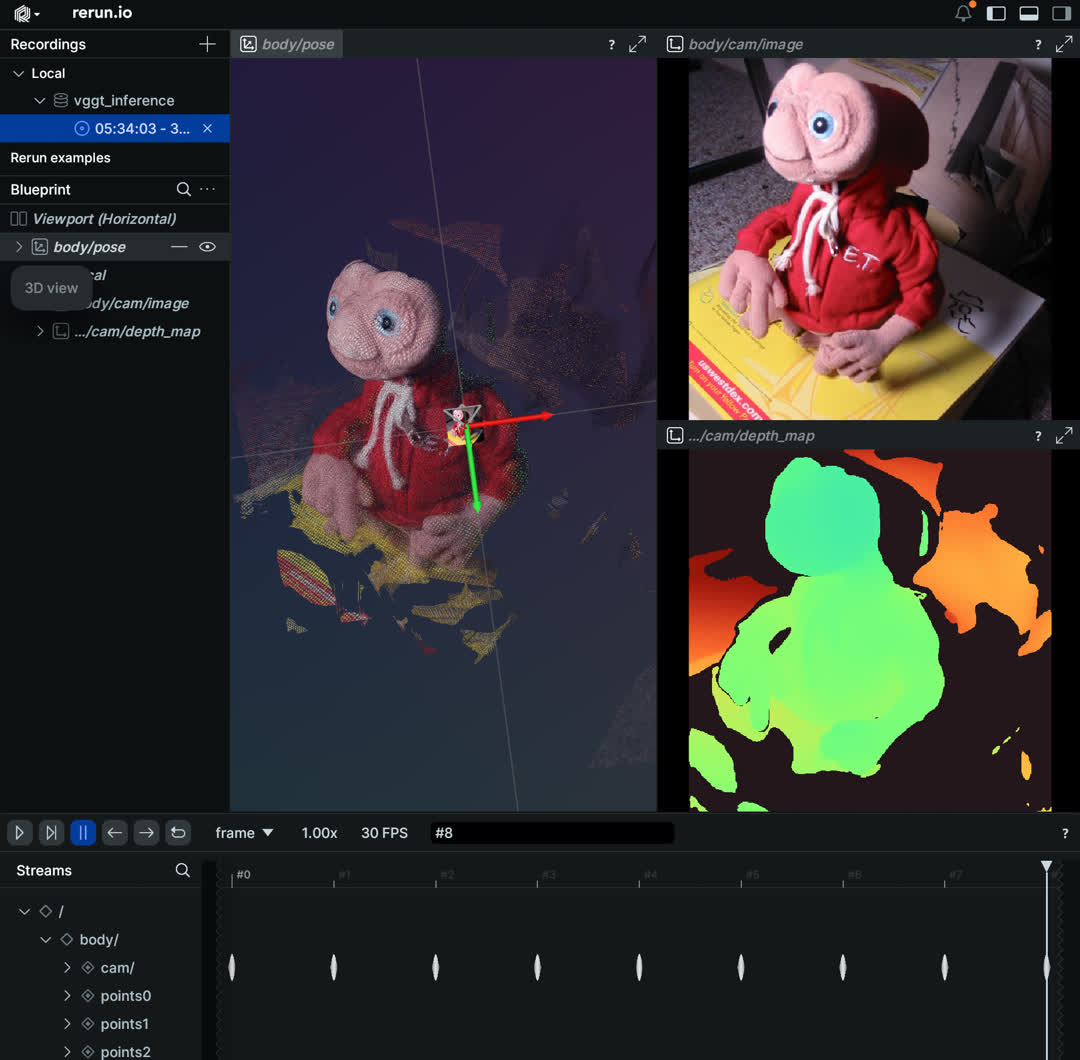